## Genes And Alleles 101

* Most multicellular organisms have **two sets of chromosomes** (e.g. they are diploid). *Human cells have 46 chromosomes.*
* Chromosomes from the same type **can be paired**. *Human cells have 22 autosome pairs and one sex pair.*
* A **gene** is is a sequence of nucleotides that encodes function in a fixed position in the chromosome called **locus**. *It is estimated that human cells have ~21,000 genes.*
* Genes have different variants called **alleles**.
* These alleles encode slightly different versions of a protein, which cause different **phenotypical traits**.

![alleles](alleles.jpeg)

## Hardy–Weinberg Law

>Allele and genotype frequencies in an **ideal population** will remain constant from generation to generation.

An "ideal" population is one in which:
* generations are nonoverlapping;
* mating is random;
* population size is infinitely large;
* allele frequencies are equal in the whole population
* there is no migration, gene flow, inbreeding, mutation or selection.

Specifically, if we consider a gene with **two alleles** $A$ and $a$ and their respectful initial frequencies are $\mathbf{f_0(A) = p}$ and $\mathbf{f_0(a) = q}$ where $\mathbf{p + q = 1}$ then the genotype frequencies in the next generation are as follows:

$f_{1}({AA})=p^{2}=f_{0}({A})^{2}$

$f_{1}({Aa})=pq+qp=2pq=2f_{0}({A})f_{0}({a})$

$f_{1}({aa})=q^{2}=f_{0}({a})^{2}$

<table style="width: 50%; text-align: left !important;">
<tbody><tr>
<th colspan="2" rowspan="2">
</th>
<th colspan="2">Females
</th></tr>
<tr>
<th>A (<i>p</i>)
</th>
<th>a (<i>q</i>)
</th></tr>
<tr>
<th rowspan="2">Males
</th>
<th>A (<i>p</i>)
</th>
<td>AA (<i>p</i><sup>2</sup>)
</td>
<td>Aa (<i>pq</i>)
</td></tr>
<tr>
<th>a (<i>q</i>)
</th>
<td>Aa (<i>qp</i>)
</td>
<td>aa (<i>q</i><sup>2</sup>)
</td></tr></tbody></table>

More generally, consider the alleles $A_1, ..., A_n$ given by the allele frequencies $p_1$ to $p_n$;

$\mathbf{f(A_{i}A_{i})=p_{i}^{2}}$ for all homozygotes and

$\mathbf{f(A_{i}A_{j})=2p_{i}p_{j}}$ for all heterozygotes.

## Departures from HW equilibrium

The vital logic of the principle is that:

1. If the assumptions of the model are true then the equations for the genotype and allele frequencies must be true.
2. **If genotypes are not in Hardy–Weinberg proportions, then at least one of the assumptions must be false.**
3. If genotypes are in HW proportions, one or more of the assumptions might still be false.

The second point is why HW is important in evolutionary genetics and forensic.
There are hardly any "ideal" populations.
But **departures from the HW equilibrium is a way to detect evolutionary forces and estimate their magnitude.**

In order to this, we have to first estimate the frequencies of both genotypes and alleles.

## Estimating allele frequencies

Given we have the genotype of random sample of individuals in a population. We then count the occurences of different alleles in a gene and infer the alleles' frequencies in the whole population. (Considering all alleles are presented in the sampled inviduals)

Let's take for example the ABO blood group system in humans:

![abo](ABO_system_codominance.svg.png)

Let's say we have sampled three individuals: (1) *AO*  (2) *AB*  (3) *AB*

Then we have **3 *A* alleles, 2 *B* alleles and 1 *O* allele**. Note that it is the same as we had have sampled: (1) *AO*  (2) *AA*  (3) *BB*.

The frequentist approach is to say that the allele frequencies in the population are 3/6 = 0.5 for *A*, 1/3 for *B* and 1/6 for *O*. This, however, doesn't incorporate any uncertainty of the data and doesn't express our prior beliefs of the actual frequencies.

That's where Bayesian Inference comes to help:

## Bayesian Model

### Likelihood

We have 3 discrete choices (alleles) for the gene each with unknown probability and 6 total observations of these choices which is a multinomial distribution. The **Multinomial distribution** is characterized by the number of outcomes ($k$), the number of trials ($n$) and a vector of probabilities of each outcome $p = (p_1, ..., p_k)$ where $\Sigma p_{i}=1$ which is what we want to figure out.

### Prior

For out prior beliefs we'll take the conjugate prior of the Multinomial distribution - **Dirichlet distribution**.
It is characterized by the the number of outcomes ($k$) and the concentration parameter **alpha** = $(\alpha_1, ... \alpha_k)$ where $\alpha_i > 0$.

A way to think of this parameter is as of pseudocounts - **how much alleles we think we should have seen**. For example, if we think the alleles are distributed equally we can choose alpha = (1, 1, 1). If we think *A* is more common than *B* and *O* we can set alpha = (2, 1, 1) where ordering is (*A*, *B*, *O*).

A Dirichlet distribution with 3 outcomes (color indicates concetration weighting):
![dirichlet](dirichlet.png)

### Posterior

Our goal is given observations $X = (X_1, . . . , X_n)$ and prior ${Dir}(\alpha)$ to find $\mathbf{P(p \mid X, \alpha)}$ where $p = (p_1, ..., p_k)$ is a vector of probabilities to see each allele.

In general, if prior is $Dir(\alpha)$ and likelihood is i.i.d. $Discrete(\theta)$, then posterior is $Dir(N + \alpha)$ as they are conjugate ([detailed proof](http://users.cecs.anu.edu.au/~ssanner/MLSS2010/Johnson1.pdf)).

Then the posterior $\mathbf{P(p \mid X, \alpha)} \sim {Dir}(N + \alpha)$.

The expected value of $Dir(\alpha)$ is $E_{{Dir}(\alpha)}[X_i] = {\frac {\alpha _{i}}{\sum _{i=1}^{K}\alpha _{i}}}$ and thus $E_{{Dir}(N + \alpha)}[X_i] = {\frac {N_i + \alpha _{i}}{N + \sum _{i=1}^{n}\alpha _{i}}}$ where $N_i$ is the observed count for each allele and $\alpha_i$ is the pseudocount for it.

We can see the expected value for different values of $\alpha$:

In [12]:
import numpy as np

def mean_dirichlet_posterior(alphas, observed):
    return (alphas + observed) / (observed.sum() + alphas.sum())

In [8]:
mean_dirichlet_posterior(np.array([1, 1, 1]), np.array([3, 2, 1]))

array([ 0.44444444,  0.33333333,  0.22222222])

In [9]:
mean_dirichlet_posterior(np.array([0.1, 0.1, 0.1]), np.array([3, 2, 1]))

array([ 0.49206349,  0.33333333,  0.17460317])

In [10]:
mean_dirichlet_posterior(np.array([5, 5, 5]), np.array([3, 2, 1]))

array([ 0.38095238,  0.33333333,  0.28571429])

In [11]:
mean_dirichlet_posterior(np.array([20, 20, 20]), np.array([3, 2, 1]))

array([ 0.34848485,  0.33333333,  0.31818182])

We can see how the hyperparameter **alpha is making a big difference** in the posterior. Bigger values mean that we are  giving more prevalence on our prior belief. alpha = (1, 1, 1) is more loose and basically let's the data speak for itself.

## Bayesian Inference With Pyro & PyTorch

In [1]:
%matplotlib inline
import pyro
import torch

import pyro.distributions as dist

from pyro.infer import EmpiricalMarginal
from pyro.infer.mcmc import MCMC, NUTS

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(palette="bright")

from scipy import stats

In [6]:
def model(data):
    alpha = [1, 1, 1]
    concentration = torch.tensor([x / sum(alpha) for x in alpha])
    parameters = pyro.sample('parameters', dist.Dirichlet(concentration)) # prior
    return pyro.sample('observed_data', dist.Multinomial(probs=parameters), obs=data)

In [40]:
data = torch.tensor([3., 2., 1.])
category_names = ['A', 'B', 'O']

nuts_kernel = NUTS(model, adapt_step_size=True)
mcmc_run = MCMC(nuts_kernel, num_samples=1000, warmup_steps=500).run(data)

Sample: 100%|██████████| 1500/1500 [00:18<00:00, 81.17it/s, step size=8.51e-01, acc. rate=0.925]


In [35]:
def plot_posterior(posterior, category_names):
    # generate Marginal distribution for `parameters` from posterior
    marginal = posterior.marginal(["parameters"])
    # get support of the marginal distribution
    trace_transition_prob = marginal.support()["parameters"]  # shape: num_samples x 3 x 3
    plt.figure(figsize=(10, 6))
    for i in range(len(category_names)):
        sns.distplot(trace_transition_prob[:, i], hist=False, label="allele {}".format(category_names[i]))
    plt.xlabel("Probability", fontsize=13)
    plt.ylabel("Frequency", fontsize=13)
    plt.title("Transition probability posterior", fontsize=15)

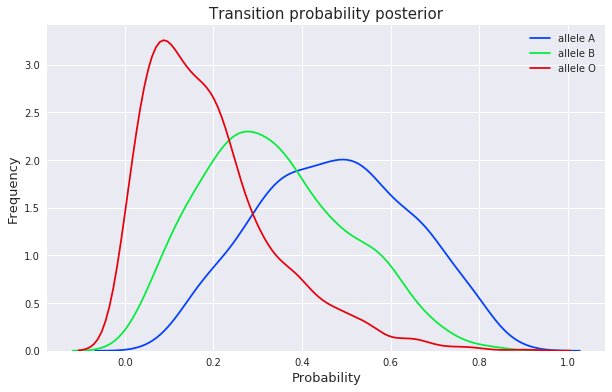

In [41]:
plot_posterior(mcmc_run, category_names)

We can clearly see that having allele A is more probable than having allele O but let's see the credible intervals:

In [37]:
def plot_hpd(category_index, category_name):
    marginal = mcmc_run.marginal(["parameters"])
    trace_transition_prob = marginal.support()["parameters"]
    category_distribution = trace_transition_prob[:, category_index]
    empirical_marginal = marginal.empirical['parameters']
    credible_interval = np.percentile(category_distribution, (2.5, 97.5))
    fig, ax = plt.subplots()
    ax.text((credible_interval[0] + credible_interval[1]) / 2.02, 20, "mean={:0.3f}".format(empirical_marginal.mean[category_index]));
    ax.text((credible_interval[0] + credible_interval[1]) / 2.02, 10, "95% HPD")
    ax.hlines(2, credible_interval[0], credible_interval[1], linewidth=4)
    ax.text(credible_interval[0], 4, "{:0.3f}".format(credible_interval[0]), weight=500, color='k');
    ax.text(credible_interval[1], 4, "{:0.3f}".format(credible_interval[1]), weight=500, color='k');
    sns.distplot(category_distribution, kde=False, bins=20)
    plt.title("Allele {}".format(category_name), fontsize=15)

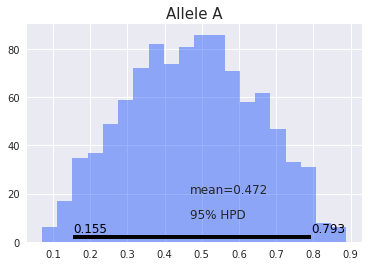

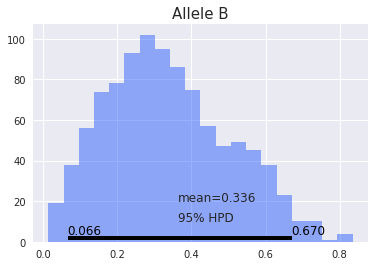

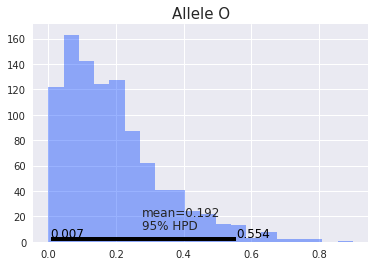

In [42]:
for i in range(len(data)):
    plot_hpd(i, category_names[i])

We can see how big are the credible intervals which reflects the small amount of data we actually have.
Let's see what happens if we have sampled more inviduals:

In [43]:
data = torch.tensor([863., 674., 123.])
category_names = ['A', 'B', 'O']

nuts_kernel = NUTS(model, adapt_step_size=True)
mcmc_run = MCMC(nuts_kernel, num_samples=1000, warmup_steps=500).run(data)

Sample: 100%|██████████| 1500/1500 [00:16<00:00, 88.69it/s, step size=9.24e-01, acc. rate=0.913] 


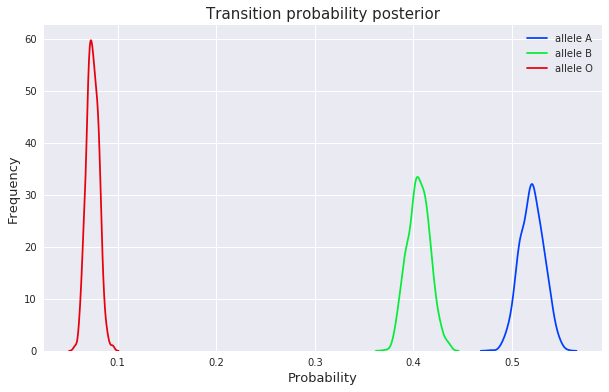

In [44]:
plot_posterior(mcmc_run, category_names)

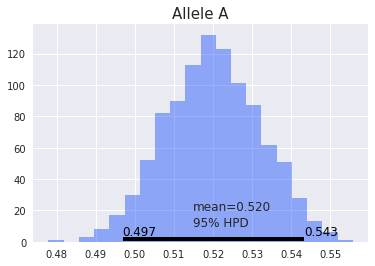

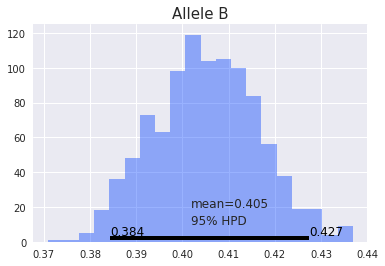

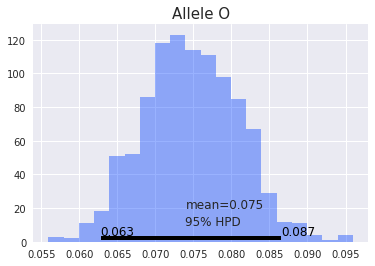

In [45]:
for i in range(len(data)):
    plot_hpd(i, category_names[i])

As expected, with more data the credible intervals are shorter and the distribution looks more like Normal distribution.

## Testing for Genetic Equilibrium

Now that we have the distribution of the allele frequencies, in order to test if they are in HW equilibrium we can:
* estimate the genotype frequencies in a similar manner;
* calculate the **expected** genotype frequencies by the HW equations;
* test if the observed genotype frequencies are (roughly) the same as the expected ones.